In [1]:
import sys
sys.version

'3.6.7 (default, Oct 22 2018, 11:32:17) \n[GCC 8.2.0]'

In [2]:
import torch
print(torch.__version__)

0.3.0.post4


In [3]:
#It's important that you have a working NVidia GPU set up. 
#The programming framework used to behind the scenes to work with NVidia GPUs is called CUDA. 
#Therefore, you need to ensure the following line returns True before you proceed. 
#If you have problems with this, please check the FAQ and ask for help on the forums.


In [4]:
#import tensorflow as tf
#tf.test.gpu_device_name()
torch.cuda.is_available()

False

In [5]:
from fastai.learner import *
from fastai.column_data import *

In [6]:
path='data/'
!ls data

arch	     models		    small_train.csv	 songs.csv  tmp
members.csv  sample_submission.csv  song_extra_info.csv  test.csv   train.csv


In [7]:
songs = pd.read_csv(path+'songs.csv')
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [8]:
songs.shape

(2296320, 7)

In [9]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
song_id        object
song_length    int64
genre_ids      object
artist_name    object
composer       object
lyricist       object
language       float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [10]:
# If there are recurring listening event(s) triggered within a month after the user’s very first
# observable listening event, its target is marked 1, and 0 otherwise in the training set.
train = pd.read_csv(path+'train.csv')
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [11]:
train.shape

(7377418, 6)

In [12]:
members = pd.read_csv(path+'members.csv')
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [13]:
members.shape

(34403, 7)

In [14]:
song_extra_info = pd.read_csv(path+'song_extra_info.csv')
song_extra_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [15]:
song_extra_info.shape

(2295971, 3)

In [16]:
test = pd.read_csv(path+'test.csv')
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [17]:
test.shape

(2556790, 6)

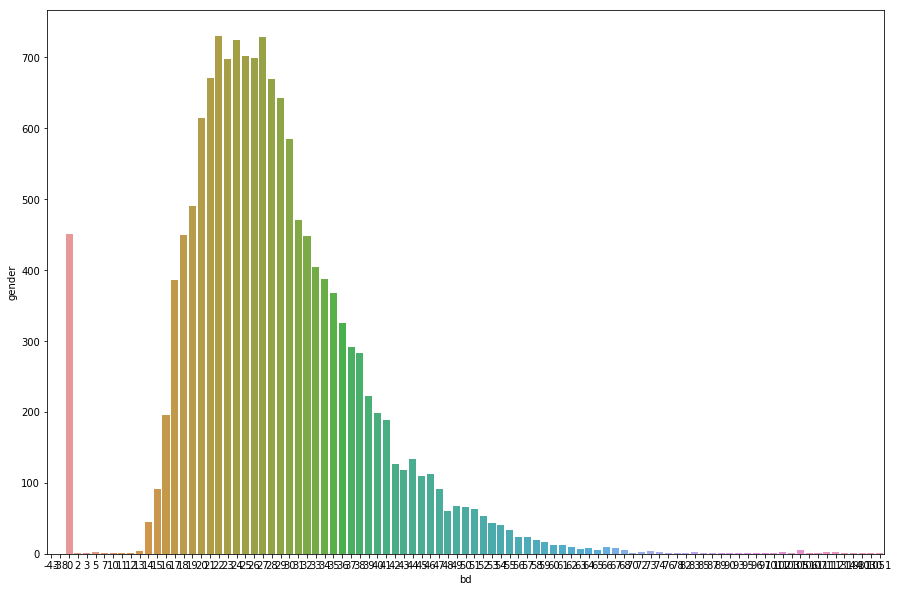

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

#Here follows the distribution of the members ages. As you can see there are several with age set to 0. 
#That is obsviously something we'll have to manage.

# bd = age
f,axarray = plt.subplots(1,1,figsize=(15,10))
agehist = members.groupby(['bd'],as_index=False).count()
sns.barplot(x=agehist['bd'],y=agehist['gender'])

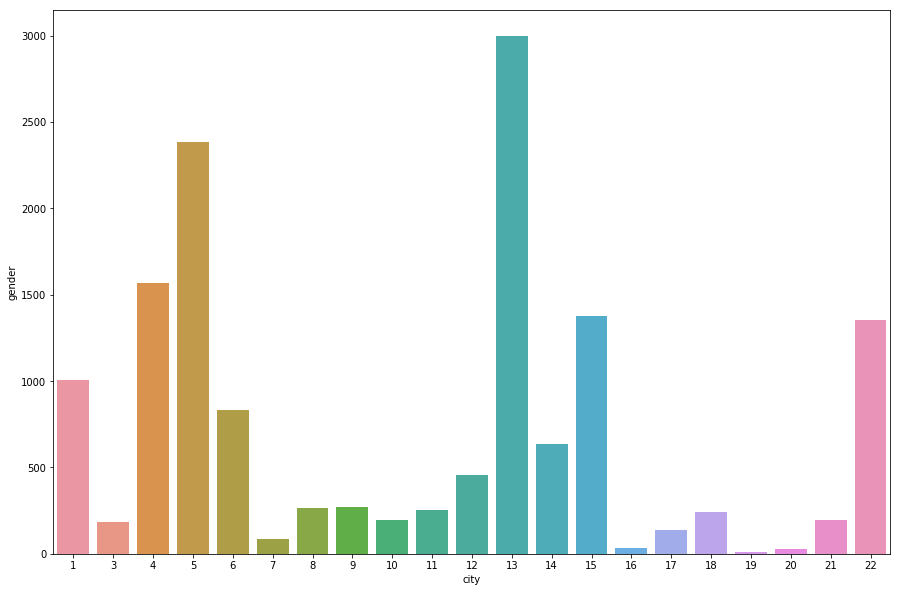

In [19]:
#Members come from 21 different cities identified with an integer index ranging from 1 to 21. 
#Here is the distribution of the members cities.
f,axarray = plt.subplots(1,1,figsize=(15,10))
cityhist = members.groupby(['city'],as_index=False).count()
sns.barplot(x=cityhist['city'],y=cityhist['gender'])

In [20]:
## Songs

print ("There are:",len(songs),"songs;",len(songs['composer'].unique()),
       "composers for",len(songs['genre_ids'].unique()),"genres in",
      len(songs['language'].unique()),"languages")

There are: 2296320 songs; 329824 composers for 1046 genres in 11 languages


In [21]:
#The following returns summarized aggregate information to each table accross each field.
display(DataFrameSummary(train).summary())

,msno,song_id,source_system_tab,source_screen_name,source_type,target
count,NaN,NaN,NaN,NaN,NaN,7.37742e+06
mean,NaN,NaN,NaN,NaN,NaN,0.503517
std,NaN,NaN,NaN,NaN,NaN,0.499988
min,NaN,NaN,NaN,NaN,NaN,0
25%,NaN,NaN,NaN,NaN,NaN,0
50%,NaN,NaN,NaN,NaN,NaN,1
75%,NaN,NaN,NaN,NaN,NaN,1
max,NaN,NaN,NaN,NaN,NaN,1
counts,7377418,7377418,7352569,6962614,7355879,7377418
uniques,30755,359966,8,20,12,2


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
target                int64
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [23]:
train.describe()

,target
count,7.377418e+06
mean,5.035171e-01
std,4.999877e-01
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,1.000000e+00


In [24]:
train['msno'].value_counts()

MXIMDXO0j3UpaT7FvOSGW6Y5zfhlh+xYjTqGoUdMzEE=    5819
o+5RNlSWrzvrphgBNGIo1FLkGxBgyICns6qXj3nS7Pk=    5537
FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=    5511
KGXNZ/H3VxvET/+rGxlrAe7Gpz2eKMXyuSg3xh8Ij1M=    4217
cqjRBV/jWN2ujhc+z/4tz+Mj6xEfflAAt6qBXCqxKvw=    4008
hYJpPvGod6vy09TnlXdQe3Q0vlxju5u5Ruf8V2XkTio=    3926
SZ5NNypqaTWljFO1HiVZwkw3713+rM9x/JNdJd8/fzc=    3733
dU4RbzpIRRd/EkA9Xncpy9CglzDBZp7nKMfdnfr3Aj8=    3686
OOUnJuX4SteRhUdJZ9B2DqtfiwsfcZVBefEhXLeBsFg=    3239
frZtrrN1Y2ZqZX3VFiq7FpAvLth3kZJNovT9cmyn2O4=    3177
7xiBI5xU3P2/IiR9teB7jySfzWo96JGikGajteLd3Cs=    3133
4tuTIArXO3WO8/zS9y2CC34ywEfChjAKUchlKW00DMM=    3030
JkQacE3rvmhh65R04eDLbu+M7MCkpzmHwMGrbZo0puc=    3027
gxxBbzV3eE2XGjUrFVB2FzAve55Oe1s86HD+OEh36Gw=    2973
1d4acB2bhEZCFjSRwvO4ls8PrBtvNTlkcAcxYx8FcWE=    2930
jL7ukei/Kb4gDCfTG4+VhV4TzLaDecjji/aW+GqWvac=    2922
y3IT85vrzY2iBxFg6nsh4Cmg+mV3oqR73TPekK7x1Rc=    2895
YU6fAgCFgPkaJ1YSW2838KzGTxmBCfgousTO8jwuHYM=    2883
TxneOykZ/MOIbQmA/aJ4EUQUIR9r+Egt6TNQu0WgwpA=  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4cbbf6080>]], dtype=object)

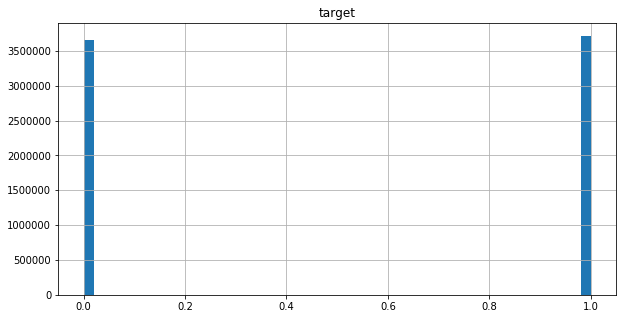

In [25]:
train.hist(bins=50, figsize=(10,5))

In [26]:
display(DataFrameSummary(songs).summary())

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
count,NaN,2.29632e+06,NaN,NaN,NaN,NaN,2.29632e+06
mean,NaN,246993,NaN,NaN,NaN,NaN,32.378
std,NaN,160920,NaN,NaN,NaN,NaN,24.3324
min,NaN,185,NaN,NaN,NaN,NaN,-1
25%,NaN,183600,NaN,NaN,NaN,NaN,-1
50%,NaN,226627,NaN,NaN,NaN,NaN,52
75%,NaN,277269,NaN,NaN,NaN,NaN,52
max,NaN,1.21738e+07,NaN,NaN,NaN,NaN,59
counts,2296320,2296320,2202204,2296320,1224966,351052,2296319
uniques,2296320,146534,1045,222363,329823,110925,10


In [27]:
display(DataFrameSummary(members).summary())

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
count,NaN,34403,34403,NaN,34403,34403,34403
mean,NaN,5.37128,12.2809,NaN,5.95338,2.01399e+07,2.0169e+07
std,NaN,6.24393,18.1703,NaN,2.28753,29540.1,7320.92
min,NaN,1,-43,NaN,3,2.00403e+07,1.97001e+07
25%,NaN,1,0,NaN,4,2.0121e+07,2.01702e+07
50%,NaN,1,0,NaN,7,2.01509e+07,2.01709e+07
75%,NaN,10,25,NaN,9,2.01611e+07,2.01709e+07
max,NaN,22,1051,NaN,16,2.01702e+07,2.0201e+07
counts,34403,34403,34403,14501,34403,34403,34403
uniques,34403,21,95,2,6,3862,1484


# Reducing Train data set for quick evaluation
## from 7.3 mln to 100K

In [28]:
smallTrain = train.head(n=100000)
smallTrain.to_csv(path+'small_train.csv',encoding='utf-8')
train.shape, smallTrain.shape

((7377418, 6), (100000, 6))

In [29]:
#create a crosstab
g=smallTrain.groupby('msno')['target'].count()
topUsers=g.sort_values(ascending=False)[:15]

g=smallTrain.groupby('song_id')['target'].count()
topMovies=g.sort_values(ascending=False)[:15]

top_r = smallTrain.join(topUsers, rsuffix='_r', how='inner', on='msno')
top_r = top_r.join(topMovies, rsuffix='_r', how='inner', on='song_id')

pd.crosstab(top_r.msno, top_r.song_id, top_r.target, aggfunc=np.sum)

song_id,+SstqMwhQPBQFTPBhLKPT642IiBDXzZFwlzsLl4cGXo=,3DU6F6k6dFSdoQa2tsia5spMXFCxWh4JJdA3OxSo3rM=,43Qm2YzsP99P5wm37B1JIhezUcQ/1CDjYlQx6rBbz2U=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,FynUyq0+drmIARmK1JZ/qcjNZ7DKkqTY6/0O0lTzNUI=,IKMFuL0f5Y8c63Hg9BXkeNJjE0z8yf3gMt/tOxF4QNE=,J4qKkLIoW7aYACuTupHLAPZYmRp08en1AEux+GSUzdw=,M9rAajz4dYuRhZ7jLvf9RRayVA3os61X/XXHEuW4giA=,OaEbZ6TJ1NePtNUeEgWsvFLeopkSln9WQu8PBR5B3+A=,PgRtmmESVNtWjoZHO5a1r21vIz9sVZmcJJpFCbRa1LI=,T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=,U9kojfZSKaiWOW94PKh1Riyv/zUWxmBRmv0XInQWLGw=,fCCmIa0Y5m+MCGbQga31MOLTIqi7ddgXvkjFPmfslGw=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,wBTWuHbjdjxnG1lQcbqnK4FddV24rUhuyrYLd9c/hmk=
msno,,,,,,,,,,,,,,,
7l7EIiyC92QhG8hE/rWXJin6ICYRL2/hnqzAHcVBGz8=,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cf2pQVKTMukspQ3RDsMyF5VXd/P0Ct1CJsbma0iSB14=,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
EozJegFxTFIWDb9aJ7O8kSUHAgx4ZIvqf7IuN5Zck50=,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
HGwvm9dAs2f3s7FRH8asP3QazYB6HPcSaA0h7CO/5KQ=,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
I81Okkh1TTHvNUw5r6DVkmtQekfricLMkDTZk4V8dHQ=,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NACTOP7JFIELvxo2Nv0vvgPOb7d18jFpiyKQAkggL/M=,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN
TVMaA7AErwJbZo9mOTs2nIuNbUfJgr9VHkkrOLhlMs8=,1.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
V5U4EGk2kaSKaUGSwhU6g3HBefxflEvAy1vWPu6UBQs=,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
W9IZME+wIFMk3DCiBwKdhMQfSuVRvGg0BP68RXkjxaA=,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


# Fast.ai Collaborative filtering

In [30]:
??CollabFilterDataset

In [31]:
val_idxs = get_cv_idxs(len(smallTrain))
wd=2e-4
n_factors = 50

In [32]:
cf = CollabFilterDataset.from_csv(path, 'small_train.csv', 'msno', 'song_id', 'target')
learn = cf.get_learner(n_factors, val_idxs, 64, opt_fn=optim.Adam)

In [33]:
# loss in plain MSE
learn.fit(1e-2, 2, wds=wd, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss                                 
    0      0.196099   0.196484  
    1      0.195524   0.193581                                 
    2      0.191195   0.193595                                 



[array([0.1936])]

In [34]:
preds = learn.predict()
preds

array([0.53949, 0.44219, 0.52825, ..., 0.56915, 0.53435, 0.60394], dtype=float32)

/home/norvilr/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


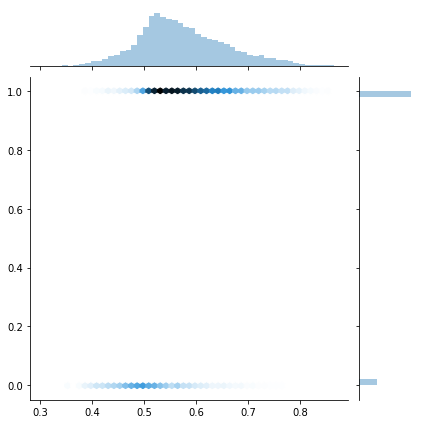

In [35]:
y=learn.data.val_y
sns.jointplot(preds, y, kind='hex', stat_func=None);

In [36]:
#create the complete dataset we have to mearge the train, members and songs dataframe.

FullDF = train.merge(members,how='inner',on='msno')
FullDF = train.merge(members,how='inner',on='msno')
FullDF.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005
1,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005
2,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005
3,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,XUz4Z4wPPChz+OIwkwj7HJ8teIjW3rEMdEATM80rDxM=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005


In [37]:
FullDF = FullDF.merge(songs,how='inner',on='song_id')
FullDF.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
1,pouJqjNRmZOnRNzzMWWkamTKkIGHyvhl/jo4HgbncnM=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,Online playlist more,online-playlist,0,15,18,male,4,20151220,20170930,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
2,xbodnNBaLMyqqI7uFJlvHOKMJaizuWo/BB/YHZICcKo=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,1,1,0,NaN,7,20120804,20171004,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
3,s0ndDsjI79amU0RBiullFN8HRz9HjE++34jGNa7zJ/s=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,1,5,21,female,9,20110808,20170917,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
4,Vw4Umh6/qlsJDC/XMslyAxVvRgFJGHr53yb/nrmY1DU=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,0,6,33,female,9,20070323,20170915,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0


In [38]:
train.shape, FullDF.shape

((7377418, 6), (7377304, 18))

In [39]:
FullDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377304 entries, 0 to 7377303
Data columns (total 18 columns):
msno                      object
song_id                   object
source_system_tab         object
source_screen_name        object
source_type               object
target                    int64
city                      int64
bd                        int64
gender                    object
registered_via            int64
registration_init_time    int64
expiration_date           int64
song_length               int64
genre_ids                 object
artist_name               object
composer                  object
lyricist                  object
language                  float64
dtypes: float64(1), int64(7), object(10)
memory usage: 1.0+ GB


In [40]:
display(DataFrameSummary(FullDF).summary())

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language
count,NaN,NaN,NaN,NaN,NaN,7.3773e+06,7.3773e+06,7.3773e+06,NaN,7.3773e+06,7.3773e+06,7.3773e+06,7.3773e+06,NaN,NaN,NaN,NaN,7.37727e+06
mean,NaN,NaN,NaN,NaN,NaN,0.503519,7.51141,17.5393,NaN,6.79407,2.01281e+07,2.01716e+07,245121,NaN,NaN,NaN,NaN,18.6093
std,NaN,NaN,NaN,NaN,NaN,0.499988,6.64163,21.5545,NaN,2.27578,30172.8,3869.84,67344.7,NaN,NaN,NaN,NaN,21.1768
min,NaN,NaN,NaN,NaN,NaN,0,1,-43,NaN,3,2.00403e+07,1.97001e+07,1393,NaN,NaN,NaN,NaN,-1
25%,NaN,NaN,NaN,NaN,NaN,0,1,0,NaN,4,2.01107e+07,2.01709e+07,214726,NaN,NaN,NaN,NaN,3
50%,NaN,NaN,NaN,NaN,NaN,1,5,21,NaN,7,2.0131e+07,2.01709e+07,241812,NaN,NaN,NaN,NaN,3
75%,NaN,NaN,NaN,NaN,NaN,1,13,29,NaN,9,2.0151e+07,2.0171e+07,272160,NaN,NaN,NaN,NaN,52
max,NaN,NaN,NaN,NaN,NaN,1,22,1051,NaN,13,2.01701e+07,2.0201e+07,1.08517e+07,NaN,NaN,NaN,NaN,59
counts,7377304,7377304,7352455,6962508,7355765,7377304,7377304,7377304,4415868,7377304,7377304,7377304,7377304,7258963,7377304,5701712,4198620,7377268
uniques,30755,359914,8,20,12,2,21,92,2,5,3811,1395,60266,572,40582,76064,33888,10
